In [1]:
# Import all dependencies
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import os
from datetime import datetime
import holidays
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
us_holidays=holidays.US()

In [2]:
# Get the holiday names
def k(x):
    if x['Holiday']:
        return us_holidays.get(x['date'])
    else:
        return "NoHoliday"
    
# Get the holidays from Calendar

dr = pd.date_range(start='2011-01-01', end='2050-12-31')
cal = calendar()
holidays = cal.holidays(start=dr.min(), end=dr.max())    
    

In [3]:
# Read the  csv
df = pd.read_csv( "rock_n_rollercoaster.csv")

# Cleanup the data to remove blank times and -999 for unavaiable data
df=df.dropna(subset=['SPOSTMIN'])
df = df[df['SPOSTMIN']>=0]


In [4]:
# Data functions for date and datetime fields for further calculations
df['date'] = pd.to_datetime(df['date'])
df['datetime'] = pd.to_datetime(df['datetime'])

# Create Time percentage as a feature
df['time_pct'] = df.datetime.apply(lambda time: (time.hour * 60 + time.minute) / (24 * 60))

# Convert date field in meaningful features

L = ['year', 'month', 'day', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter','is_month_start','is_month_end','is_quarter_start']
df = df.join(pd.concat((getattr(df['date'].dt, i).rename(i) for i in L), axis=1))


    
# Scale the data by bringing them as max 1
df['month'] = df['month'] / 12.0
df['day'] = df['day'] / 31.0
df['dayofweek'] = df['dayofweek'] / 6.0 
df['dayofyear'] = df['dayofyear'] / 366.0
df['weekofyear'] = df['weekofyear'] / 53.0
df['quarter'] = df['quarter'] / 4.0    


# Find if a date was a holiday

df['Holiday'] = df['date'].isin(holidays)
df['holidaynames'] = df['date'].apply(lambda row: us_holidays.get(row))


In [5]:
df.columns

Index(['date', 'datetime', 'SPOSTMIN', 'SACTMIN', 'time_pct', 'year', 'month',
       'day', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter',
       'is_month_start', 'is_month_end', 'is_quarter_start', 'Holiday',
       'holidaynames'],
      dtype='object')

In [6]:
df = pd.get_dummies(df, columns=['holidaynames'])

In [7]:
df.columns

Index(['date', 'datetime', 'SPOSTMIN', 'SACTMIN', 'time_pct', 'year', 'month',
       'day', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter',
       'is_month_start', 'is_month_end', 'is_quarter_start', 'Holiday',
       'holidaynames_Christmas Day', 'holidaynames_Christmas Day (Observed)',
       'holidaynames_Columbus Day', 'holidaynames_Independence Day',
       'holidaynames_Independence Day (Observed)', 'holidaynames_Labor Day',
       'holidaynames_Martin Luther King, Jr. Day', 'holidaynames_Memorial Day',
       'holidaynames_New Year's Day', 'holidaynames_New Year's Day (Observed)',
       'holidaynames_Thanksgiving', 'holidaynames_Veterans Day',
       'holidaynames_Veterans Day (Observed)',
       'holidaynames_Washington's Birthday'],
      dtype='object')

In [8]:
print(df.shape)
df.head(10)

(243075, 30)


,date,datetime,SPOSTMIN,SACTMIN,time_pct,year,month,day,dayofweek,dayofyear,...,holidaynames_Independence Day (Observed),holidaynames_Labor Day,"holidaynames_Martin Luther King, Jr. Day",holidaynames_Memorial Day,holidaynames_New Year's Day,holidaynames_New Year's Day (Observed),holidaynames_Thanksgiving,holidaynames_Veterans Day,holidaynames_Veterans Day (Observed),holidaynames_Washington's Birthday
1,2012-01-01,2012-01-01 15:06:00,50.0,NaN,0.629167,2012,0.083333,0.032258,1.0,0.002732,...,0,0,0,0,1,0,0,0,0,0
2,2012-01-01,2012-01-01 15:15:00,50.0,NaN,0.635417,2012,0.083333,0.032258,1.0,0.002732,...,0,0,0,0,1,0,0,0,0,0
3,2012-01-01,2012-01-01 15:32:00,50.0,NaN,0.647222,2012,0.083333,0.032258,1.0,0.002732,...,0,0,0,0,1,0,0,0,0,0
4,2012-01-01,2012-01-01 15:52:00,50.0,NaN,0.661111,2012,0.083333,0.032258,1.0,0.002732,...,0,0,0,0,1,0,0,0,0,0
5,2012-01-01,2012-01-01 16:07:00,70.0,NaN,0.671528,2012,0.083333,0.032258,1.0,0.002732,...,0,0,0,0,1,0,0,0,0,0
6,2012-01-01,2012-01-01 18:05:00,70.0,NaN,0.753472,2012,0.083333,0.032258,1.0,0.002732,...,0,0,0,0,1,0,0,0,0,0
7,2012-01-02,2012-01-02 09:50:00,30.0,NaN,0.409722,2012,0.083333,0.064516,0.0,0.005464,...,0,0,0,0,0,1,0,0,0,0
8,2012-01-02,2012-01-02 10:06:00,40.0,NaN,0.420833,2012,0.083333,0.064516,0.0,0.005464,...,0,0,0,0,0,1,0,0,0,0
9,2012-01-02,2012-01-02 10:11:00,80.0,NaN,0.424306,2012,0.083333,0.064516,0.0,0.005464,...,0,0,0,0,0,1,0,0,0,0
10,2012-01-02,2012-01-02 10:33:00,80.0,NaN,0.439583,2012,0.083333,0.064516,0.0,0.005464,...,0,0,0,0,0,1,0,0,0,0


In [9]:
# Pick the X axis- featues
data=df.drop(columns=['date', 'datetime', 'SPOSTMIN', 'SACTMIN', 'year'])
columns=data.columns
print(columns)
data.head()

Index(['time_pct', 'month', 'day', 'dayofweek', 'dayofyear', 'weekofyear',
       'quarter', 'is_month_start', 'is_month_end', 'is_quarter_start',
       'Holiday', 'holidaynames_Christmas Day',
       'holidaynames_Christmas Day (Observed)', 'holidaynames_Columbus Day',
       'holidaynames_Independence Day',
       'holidaynames_Independence Day (Observed)', 'holidaynames_Labor Day',
       'holidaynames_Martin Luther King, Jr. Day', 'holidaynames_Memorial Day',
       'holidaynames_New Year's Day', 'holidaynames_New Year's Day (Observed)',
       'holidaynames_Thanksgiving', 'holidaynames_Veterans Day',
       'holidaynames_Veterans Day (Observed)',
       'holidaynames_Washington's Birthday'],
      dtype='object')


,time_pct,month,day,dayofweek,dayofyear,weekofyear,quarter,is_month_start,is_month_end,is_quarter_start,...,holidaynames_Independence Day (Observed),holidaynames_Labor Day,"holidaynames_Martin Luther King, Jr. Day",holidaynames_Memorial Day,holidaynames_New Year's Day,holidaynames_New Year's Day (Observed),holidaynames_Thanksgiving,holidaynames_Veterans Day,holidaynames_Veterans Day (Observed),holidaynames_Washington's Birthday
1,0.629167,0.083333,0.032258,1.0,0.002732,0.981132,0.25,True,False,True,...,0,0,0,0,1,0,0,0,0,0
2,0.635417,0.083333,0.032258,1.0,0.002732,0.981132,0.25,True,False,True,...,0,0,0,0,1,0,0,0,0,0
3,0.647222,0.083333,0.032258,1.0,0.002732,0.981132,0.25,True,False,True,...,0,0,0,0,1,0,0,0,0,0
4,0.661111,0.083333,0.032258,1.0,0.002732,0.981132,0.25,True,False,True,...,0,0,0,0,1,0,0,0,0,0
5,0.671528,0.083333,0.032258,1.0,0.002732,0.981132,0.25,True,False,True,...,0,0,0,0,1,0,0,0,0,0


In [10]:
#Y Axis
target = df['SPOSTMIN']

In [11]:
#Split the data in train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)
print(X_train.shape)
X_train.head()
# X_test
# y_train
# y_test

(182306, 25)


,time_pct,month,day,dayofweek,dayofyear,weekofyear,quarter,is_month_start,is_month_end,is_quarter_start,...,holidaynames_Independence Day (Observed),holidaynames_Labor Day,"holidaynames_Martin Luther King, Jr. Day",holidaynames_Memorial Day,holidaynames_New Year's Day,holidaynames_New Year's Day (Observed),holidaynames_Thanksgiving,holidaynames_Veterans Day,holidaynames_Veterans Day (Observed),holidaynames_Washington's Birthday
241381,0.599306,0.666667,0.741935,0.500000,0.642077,0.641509,0.75,False,False,False,...,0,0,0,0,0,0,0,0,0,0
204557,0.709722,0.833333,0.903226,0.833333,0.822404,0.811321,1.00,False,False,False,...,0,0,0,0,0,0,0,0,0,0
190445,0.748611,0.500000,0.935484,0.500000,0.491803,0.490566,0.50,False,False,False,...,0,0,0,0,0,0,0,0,0,0
243632,0.640972,0.750000,0.258065,0.833333,0.685792,0.679245,0.75,False,False,False,...,0,0,0,0,0,0,0,0,0,0
70927,0.779167,0.666667,0.580645,0.000000,0.628415,0.641509,0.75,False,False,False,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# first, create a normal neural network with 10 inputs, 3 hidden nodes, and 20 outputs LIner as we need waittimes
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=500, activation='relu', input_dim=25))
model.add(Dense(units=200, activation='relu'))
model.add(Dense(units=80, activation='relu'))
model.add(Dense(units=1, activation='linear'))

In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 500)               13000     
_________________________________________________________________
dense_10 (Dense)             (None, 200)               100200    
_________________________________________________________________
dense_11 (Dense)             (None, 80)                16080     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 81        
Total params: 129,361
Trainable params: 129,361
Non-trainable params: 0
_________________________________________________________________


In [35]:
#Compile the model

model.compile(optimizer="adam", loss="mean_squared_error")

In [36]:
y_train.describe()

count    182306.000000
mean         57.079114
std          30.851884
min           0.000000
25%          35.000000
50%          50.000000
75%          75.000000
max         250.000000
Name: SPOSTMIN, dtype: float64

In [37]:
# Fit the model
model.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
182306/182306 [==============================] - 19s 103us/step - loss: 829.1517
Epoch 2/1000
182306/182306 [==============================] - 19s 105us/step - loss: 647.6768
Epoch 3/1000
182306/182306 [==============================] - 20s 108us/step - loss: 615.8039
Epoch 4/1000
182306/182306 [==============================] - 17s 94us/step - loss: 596.5853
Epoch 5/1000
182306/182306 [==============================] - 17s 94us/step - loss: 577.8556
Epoch 6/1000
182306/182306 [==============================] - 28s 156us/step - loss: 565.4062
Epoch 7/1000
182306/182306 [==============================] - 32s 178us/step - loss: 555.6641
Epoch 8/1000
182306/182306 [==============================] - 32s 173us/step - loss: 546.3495
Epoch 9/1000
182306/182306 [==============================] - 30s 167us/step - loss: 535.6111
Epoch 10/1000
182306/182306 [==============================] - 30s 165us/step - loss: 530.0686
Epoch 11/1000
182306/182306 [==============================] 

182306/182306 [==============================] - 34s 186us/step - loss: 371.2358
Epoch 88/1000
182306/182306 [==============================] - 33s 182us/step - loss: 370.5633
Epoch 89/1000
182306/182306 [==============================] - 30s 162us/step - loss: 369.7760
Epoch 90/1000
182306/182306 [==============================] - 29s 157us/step - loss: 369.3553
Epoch 91/1000
182306/182306 [==============================] - 29s 158us/step - loss: 368.5505
Epoch 92/1000
182306/182306 [==============================] - 29s 161us/step - loss: 367.9087
Epoch 93/1000
182306/182306 [==============================] - 29s 162us/step - loss: 366.9452
Epoch 94/1000
182306/182306 [==============================] - 29s 162us/step - loss: 366.7051
Epoch 95/1000
182306/182306 [==============================] - 30s 163us/step - loss: 366.0094
Epoch 96/1000
182306/182306 [==============================] - 30s 164us/step - loss: 364.9149
Epoch 97/1000
182306/182306 [==============================] - 2

182306/182306 [==============================] - 32s 176us/step - loss: 331.5747
Epoch 174/1000
182306/182306 [==============================] - 32s 176us/step - loss: 331.5056
Epoch 175/1000
182306/182306 [==============================] - 32s 176us/step - loss: 330.4106
Epoch 176/1000
182306/182306 [==============================] - 32s 174us/step - loss: 330.7784
Epoch 177/1000
182306/182306 [==============================] - 31s 170us/step - loss: 329.9968
Epoch 178/1000
182306/182306 [==============================] - 32s 177us/step - loss: 329.8433
Epoch 179/1000
182306/182306 [==============================] - 31s 168us/step - loss: 330.0580
Epoch 180/1000
182306/182306 [==============================] - 30s 167us/step - loss: 329.5019
Epoch 181/1000
182306/182306 [==============================] - 29s 160us/step - loss: 328.9988
Epoch 182/1000
182306/182306 [==============================] - 31s 169us/step - loss: 329.2109
Epoch 183/1000
182306/182306 [=========================

182306/182306 [==============================] - 50s 276us/step - loss: 310.9504
Epoch 260/1000
182306/182306 [==============================] - 50s 273us/step - loss: 310.4734
Epoch 261/1000
182306/182306 [==============================] - 49s 270us/step - loss: 309.6494
Epoch 265/1000
182306/182306 [==============================] - 48s 266us/step - loss: 309.1721
Epoch 266/1000
182306/182306 [==============================] - 50s 272us/step - loss: 309.6865
Epoch 267/1000
182306/182306 [==============================] - 49s 271us/step - loss: 309.2596
Epoch 268/1000
182306/182306 [==============================] - 48s 265us/step - loss: 308.6982
Epoch 269/1000
182306/182306 [==============================] - 50s 274us/step - loss: 308.8590
Epoch 270/1000
182306/182306 [==============================] - 49s 270us/step - loss: 308.2425
Epoch 272/1000
182306/182306 [==============================] - 53s 292us/step - loss: 308.8539
Epoch 273/1000
182306/182306 [=========================

In [40]:
#Evaluate the loss in model

np.sqrt(model.evaluate(X_test, y_test))

60769/60769 [==============================] - 5s 76us/step


18.25174655722153

In [41]:
model.save("rocknroller.h5")

In [42]:
# Load the model
from keras.models import load_model
model = load_model("rocknroller.h5")

In [43]:
#Evaluate the loaded  model

np.sqrt(model.evaluate(X_test, y_test))

60769/60769 [==============================] - 5s 84us/step


18.25174655722153

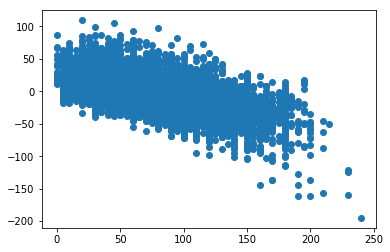

In [44]:
import matplotlib.pyplot as plt

plt.scatter(y_test, model.predict(X_test)[:,0] - y_test)




# GET The model to Predict



In [45]:
time_pct=['0.33','0.38','0.42','0.46','0.50','0.54','0.58','0.63','0.67','0.71','0.75']
numberofresults = len(time_pct)
numberofresults
waittime2=[]


def add_missing_dummy_columns( d, columns ):
    missing_cols = set( columns ) - set( d.columns )
    for c in missing_cols:
        d[c] = 0
        
for i in range(numberofresults): 

# GET The model to Predict
    df1 = pd.DataFrame({'date': ['2019-02-14']},index=[1])
    df1['date'] = pd.to_datetime(df1['date'])
    df1['time_pct'] = time_pct[i] 
    L = ['year', 'month', 'day', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter','is_month_start','is_month_end','is_quarter_start']
    df1 = df1.join(pd.concat((getattr(df1['date'].dt, i).rename(i) for i in L), axis=1))
    df1['Holiday'] = df1['date'].isin(holidays)
    df1['month'] = df1['month'] / 12.0
    df1['day'] = df1['day'] / 31.0
    df1['dayofweek'] = df1['dayofweek'] / 6.0 
    df1['dayofyear'] = df1['dayofyear'] / 366.0
    df1['weekofyear'] = df1['weekofyear'] / 53.0
    df1['quarter'] = df1['quarter'] / 4.0
    df1['holidaynames'] = df1['date'].apply(lambda row: us_holidays.get(row))
    data1=df1[[ 'time_pct', 'month','day','dayofweek','weekofyear','quarter','is_month_start','is_month_end','is_quarter_start','Holiday','holidaynames']]
    data1 = pd.get_dummies(data1, columns=['holidaynames'])
    
    
    data2 = data1.copy()
    data2_binary_encoded = data2


        
    add_missing_dummy_columns(data2_binary_encoded, data.columns)        

    
    class_prob=model.predict(data2_binary_encoded)
    #print (class_prob)
    wt=class_prob.item(0)
    #print(wt)
# apend to store array
    waittime2.append(wt)

#end for loop

time_of_day=[8,9,10,11,12,13,14,15,16,17,18]
print (waittime2)

    



[-22.837038040161133, -50.67121887207031, 59.1334228515625, 89.9439468383789, 91.5518798828125, 87.43336486816406, 90.51826477050781, 87.84209442138672, 84.43248748779297, 80.44674682617188, 59.25102233886719]


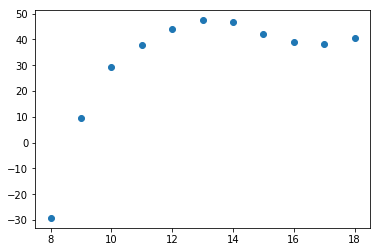

In [29]:
  import matplotlib.pyplot as plt

plt.scatter(time_of_day, waittime2)

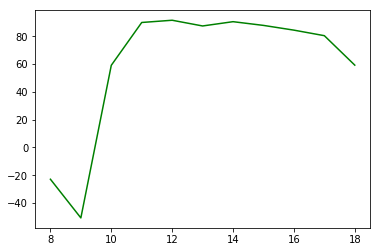

In [47]:
import matplotlib.pyplot as plt

x = time_of_day
y = waittime2
#plt.scatter(x, y)

plt.plot(x, y, color="green", label="Wins")

plt.show()

In [ ]:
# Create a list of the years that we will use as our x axis
years = [2013,2014,2015,2016]

# Plot our line that will be used to track a wrestler's wins over the years
plt.plot(years, wins_over_time, color="green", label="Wins")

# Plot our line that will be used to track a wrestler's losses over the years
plt.plot(years, losses_over_time, color="blue", label="Losses")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title(wrestler_name + "'s Recent Career")
plt.xlabel("Years")
plt.ylabel("Number of Wins/Losses")

# Print our chart to the screen
plt.show()


In [48]:
time_pct=['0.33','0.38','0.42','0.46','0.50','0.54','0.58','0.63','0.67','0.71','0.75']
numberofresults = len(time_pct)
numberofresults
waittime2=[]


def add_missing_dummy_columns( d, columns ):
    missing_cols = set( columns ) - set( d.columns )
    for c in missing_cols:
        d[c] = 0
        
for i in range(numberofresults): 

# GET The model to Predict
    df1 = pd.DataFrame({'date': ['2019-04-09']},index=[1])
    df1['date'] = pd.to_datetime(df1['date'])
    df1['time_pct'] = time_pct[i] 
    L = ['year', 'month', 'day', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter','is_month_start','is_month_end','is_quarter_start']
    df1 = df1.join(pd.concat((getattr(df1['date'].dt, i).rename(i) for i in L), axis=1))
    df1['Holiday'] = df1['date'].isin(holidays)
    df1['month'] = df1['month'] / 12.0
    df1['day'] = df1['day'] / 31.0
    df1['dayofweek'] = df1['dayofweek'] / 6.0 
    df1['dayofyear'] = df1['dayofyear'] / 366.0
    df1['weekofyear'] = df1['weekofyear'] / 53.0
    df1['quarter'] = df1['quarter'] / 4.0
    df1['holidaynames'] = df1['date'].apply(lambda row: us_holidays.get(row))
    data1=df1[[ 'time_pct', 'month','day','dayofweek','weekofyear','quarter','is_month_start','is_month_end','is_quarter_start','Holiday','holidaynames']]
    data1 = pd.get_dummies(data1, columns=['holidaynames'])
    
    
    data2 = data1.copy()
    data2_binary_encoded = data2


        
    add_missing_dummy_columns(data2_binary_encoded, data.columns)        

    
    class_prob=model.predict(data2_binary_encoded)
    #print (class_prob)
    wt=class_prob.item(0)
    #print(wt)
# apend to store array
    waittime2.append(wt)

#end for loop

time_of_day=[8,9,10,11,12,13,14,15,16,17,18]
print (waittime2)



[53.326995849609375, 17.373952865600586, 75.33866882324219, 96.97305297851562, 108.2661361694336, 108.55113983154297, 105.47917175292969, 95.843017578125, 84.7342529296875, 70.308837890625, 58.47165298461914]


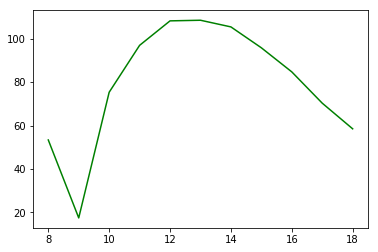

In [49]:
import matplotlib.pyplot as plt

x = time_of_day
y = waittime2
#plt.scatter(x, y)

plt.plot(x, y, color="green", label="Wins")

plt.show()